# üì¶ Desafio 05 - An√°lise Explorat√≥ria com Boxplot

Neste desafio do #7DaysOfCode, o objetivo √© analisar a distribui√ß√£o de empr√©stimos mensais por ano, comparando dois grupos de usu√°rios: alunos de gradua√ß√£o e alunos de p√≥s-gradua√ß√£o. Utilizaremos gr√°ficos de boxplot para observar padr√µes, varia√ß√µes e poss√≠veis outliers nos dados de 2010 a 2020.

Vamos come√ßar pela prepara√ß√£o dos dados!

In [1]:
import pandas as pd

# Importando o dataset completo gerado no desafio04
df = pd.read_csv('../desafio04/dataset_completo.csv')

# Visualizando as primeiras linhas
df.head(3)

C:\Users\Jhonny\AppData\Local\Temp\ipykernel_19108\256611724.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../desafio04/dataset_completo.csv')


id_emprestimo codigo_barras           data_renovacao  \
0         709684       L095049                      NaN   
1         709685       L167050                      NaN   
2         709686    2006017618  2010-01-26 08:07:01.738   

           data_emprestimo           data_devolucao  matricula_ou_siape  \
0  2010-01-04 07:44:10.721  2010-01-05 16:26:12.662        2.008023e+09   
1  2010-01-04 07:44:10.750  2010-01-12 07:34:13.934        2.008023e+09   
2  2010-01-04 08:08:44.081  2010-02-25 07:36:25.800        2.008112e+09   

     tipo_vinculo_usuario  id_exemplar            colecao  \
0      ALUNO DE GRADUA√á√ÉO      13259.0  Acervo Circulante   
1      ALUNO DE GRADUA√á√ÉO      70865.0  Acervo Circulante   
2  ALUNO DE P√ìS-GRADUA√á√ÉO     195347.0  Acervo Circulante   

                                          biblioteca status_material  \
0                     Biblioteca Central Zila Mamede         REGULAR   
1                     Biblioteca Central Zila Mamede         REGULAR   
2  Biblioteca Setorial Prof. Rodolfo Helinski - E...         REGULAR   

   localizacao          classe_cdu  
0          630  Ci√™ncias aplicadas  
1          647  Ci√™ncias aplicadas  
2          640  Ci√™ncias aplicadas

## üéì Filtrando apenas alunos de Gradua√ß√£o e P√≥s-Gradua√ß√£o

Vamos focar nossa an√°lise em dois grupos principais de usu√°rios: alunos de gradua√ß√£o e de p√≥s-gradua√ß√£o.


In [2]:
usuarios_validos = ['ALUNO DE GRADUA√á√ÉO', 'ALUNO DE P√ìS-GRADUA√á√ÉO']
df_filtrado = df[df['tipo_vinculo_usuario'].isin(usuarios_validos)].copy()
df_filtrado['tipo_vinculo_usuario'].value_counts()

tipo_vinculo_usuario
ALUNO DE GRADUA√á√ÉO        1771903
ALUNO DE P√ìS-GRADUA√á√ÉO     320074
Name: count, dtype: int64

## üìö Identificando a cole√ß√£o com maior n√∫mero de empr√©stimos

O objetivo √© focar a an√°lise na cole√ß√£o mais emprestada, conforme sugerido pelo enunciado.


In [3]:
df_filtrado['colecao'].value_counts()

colecao
Acervo Circulante                        1899356
Multimeios                                  5211
Monografias                                 3850
Disserta√ß√µes                                2086
Obras de Refer√™ncia                         1747
Publica√ß√µes de Autores do RN                 799
Teses                                        612
Publica√ß√µes da UFRN                          587
Folhetos                                     240
Trabalho Acad√™mico                           104
Necessidades Educacionais Espec√≠ficas        103
Eventos                                       83
Cole√ß√£o Mossoroense                           40
Cole√ß√£o Zila Mamede                           26
Literatura de Cordel                          15
Obras Raras                                    6
Name: count, dtype: int64

In [5]:
colecao_principal = 'Acervo Circulante'
df_filtrado = df_filtrado[df_filtrado['colecao'] == colecao_principal].copy()
df_filtrado.value_counts()

id_emprestimo  codigo_barras  data_renovacao           data_emprestimo          data_devolucao              matricula_ou_siape  tipo_vinculo_usuario    id_exemplar  colecao            biblioteca                                                                                status_material  localizacao  classe_cdu        
709686         2006017618     2010-01-26 08:07:01.738  2010-01-04 08:08:44.081  2010-02-25 07:36:25.800     2.008112e+09        ALUNO DE P√ìS-GRADUA√á√ÉO  195347.0     Acervo Circulante  Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agr√≠cola de Jundia√≠ - EAJ  - Macaiba  REGULAR          640          Ci√™ncias aplicadas    1
784751         2009043987     2010-06-29 21:14:17.770  2010-05-31 16:33:39.685  2010-07-19 14:23:46.000     2.010108e+09        ALUNO DE P√ìS-GRADUA√á√ÉO  277416.0     Acervo Circulante  Biblioteca Central Zila Mamede                                                            REGULAR          622          Ci√™ncias aplicadas    1
784824     

## üìÜ Agrupando empr√©stimos mensais por ano

A ideia agora √© transformar os dados para que possamos comparar, ano a ano, como se distribuem os empr√©stimos realizados mensalmente por cada tipo de usu√°rio.

In [6]:
# Convertendo a coluna data_emprestimo para datetime, se ainda n√£o estiver
df_filtrado['data_emprestimo'] = pd.to_datetime(df_filtrado['data_emprestimo'], errors='coerce')

# Criando colunas auxiliares de ano e m√™s
df_filtrado['ano'] = df_filtrado['data_emprestimo'].dt.year
df_filtrado['mes'] = df_filtrado['data_emprestimo'].dt.month

# Filtrando per√≠odo de interesse: 2010 a 2020
df_filtrado = df_filtrado[(df_filtrado['ano'] >= 2010) & (df_filtrado['ano'] <= 2020)]

# Agrupando por ano, m√™s e tipo de v√≠nculo
emprestimos_mensais = df_filtrado.groupby(['tipo_vinculo_usuario', 'ano', 'mes'])['id_emprestimo'].count().reset_index()

# Renomeando para facilitar
emprestimos_mensais.columns = ['tipo_vinculo_usuario', 'ano', 'mes', 'quantidade_emprestimos']

# Visualizando
emprestimos_mensais.head()

tipo_vinculo_usuario   ano  mes  quantidade_emprestimos
0   ALUNO DE GRADUA√á√ÉO  2010    1                    2996
1   ALUNO DE GRADUA√á√ÉO  2010    2                    7769
2   ALUNO DE GRADUA√á√ÉO  2010    3                   15275
3   ALUNO DE GRADUA√á√ÉO  2010    4                   12430
4   ALUNO DE GRADUA√á√ÉO  2010    5                   12164

## üìä Criando boxplots comparativos

Com os dados agrupados, vamos utilizar o gr√°fico de boxplot para visualizar a distribui√ß√£o mensal dos empr√©stimos ao longo dos anos, para cada tipo de usu√°rio (Gradua√ß√£o e P√≥s-Gradua√ß√£o).

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo mais profissional e limpo
sns.set_theme(style="whitegrid", palette="pastel")

def plot_boxplot_melhorado(df, titulo, cor='skyblue'):
    plt.figure(figsize=(14, 6))
    ax = sns.boxplot(x='ano', y='quantidade', data=df, color=cor, width=0.6, fliersize=4, linewidth=1)
    
    # Ajustes est√©ticos
    ax.set_title(titulo, fontsize=16, weight='bold')
    ax.set_xlabel("Ano", fontsize=12)
    ax.set_ylabel("Quantidade Mensal de Empr√©stimos", fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    
    # Remover as bordas superiores e laterais
    sns.despine()
    
    plt.tight_layout()
    plt.show()


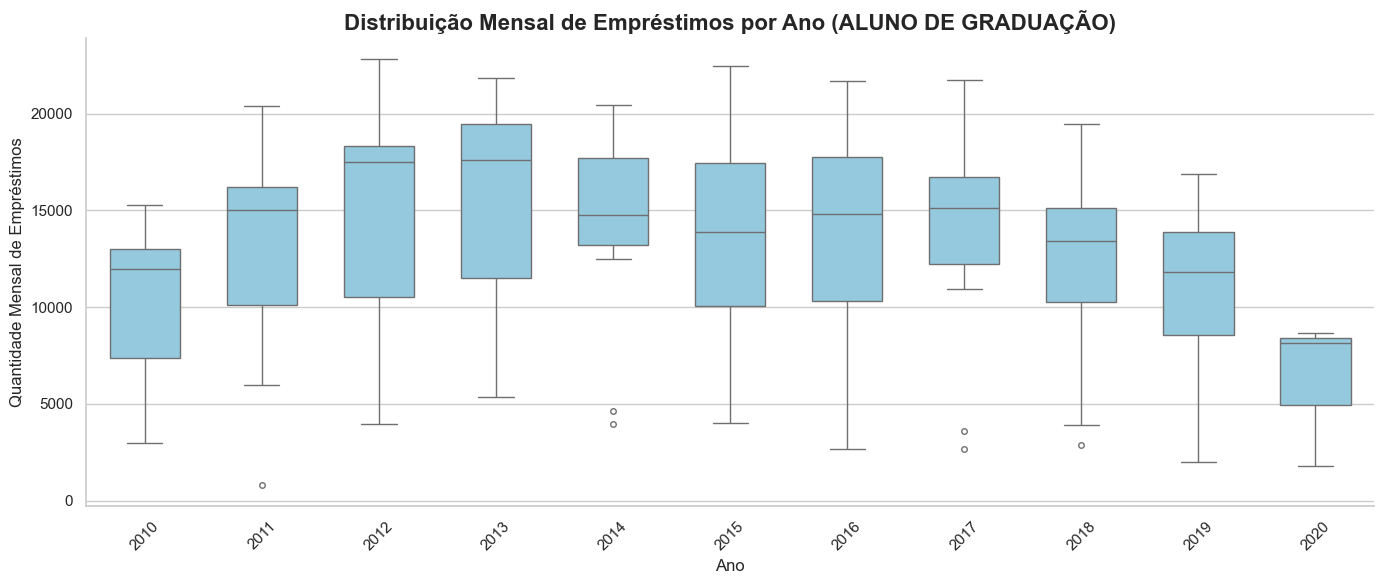

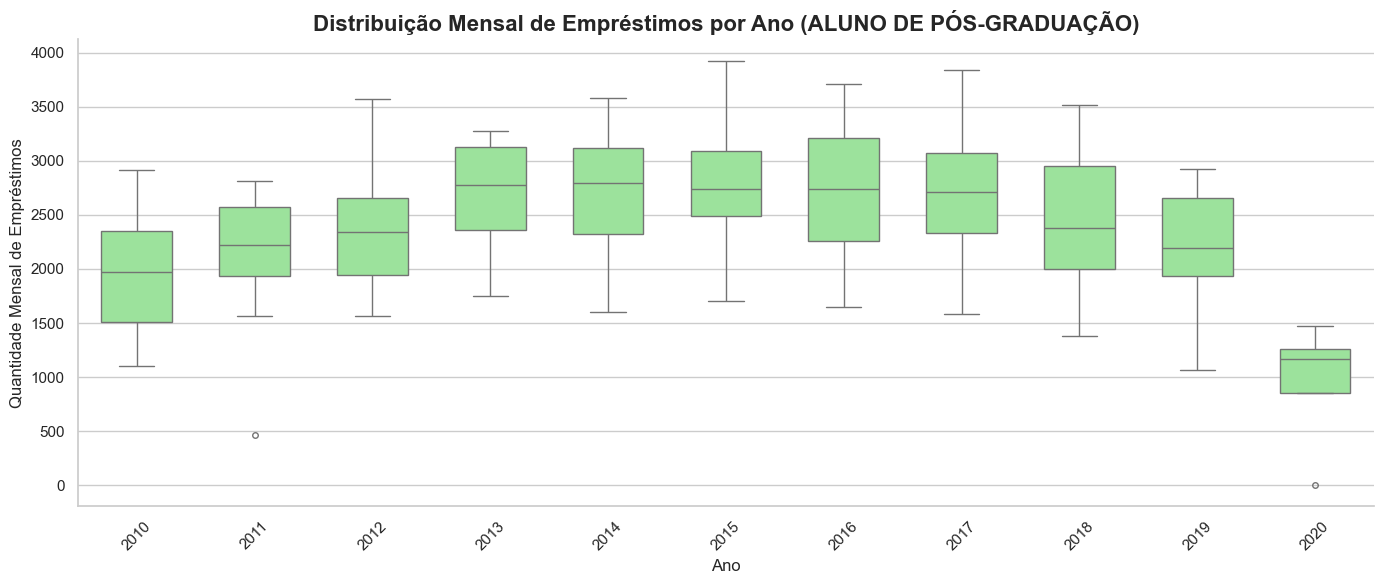

In [14]:
df_grad_box = emprestimos_mensais[emprestimos_mensais['tipo_vinculo_usuario'] == 'ALUNO DE GRADUA√á√ÉO'].copy()
df_grad_box = df_grad_box.rename(columns={'quantidade_emprestimos': 'quantidade'})

df_pos_box = emprestimos_mensais[emprestimos_mensais['tipo_vinculo_usuario'] == 'ALUNO DE P√ìS-GRADUA√á√ÉO'].copy()
df_pos_box = df_pos_box.rename(columns={'quantidade_emprestimos': 'quantidade'})

plot_boxplot_melhorado(df_grad_box, 'Distribui√ß√£o Mensal de Empr√©stimos por Ano (ALUNO DE GRADUA√á√ÉO)', cor='skyblue')
plot_boxplot_melhorado(df_pos_box, 'Distribui√ß√£o Mensal de Empr√©stimos por Ano (ALUNO DE P√ìS-GRADUA√á√ÉO)', cor='lightgreen')


## üìä An√°lise Final - Boxplot por Tipo de Usu√°rio

A an√°lise da distribui√ß√£o mensal de empr√©stimos entre os anos de **2010 a 2020** nos permite compreender o comportamento dos dois principais p√∫blicos da biblioteca: **alunos de gradua√ß√£o** e **alunos de p√≥s-gradua√ß√£o**.

---

### üéì Alunos de Gradua√ß√£o

- üìà **Crescimento consistente de 2010 a 2013**, com eleva√ß√£o progressiva da mediana e aumento da variabilidade mensal.
- ‚öñÔ∏è **Estabiliza√ß√£o entre 2014 e 2017**, com redu√ß√£o da dispers√£o dos dados e manuten√ß√£o de um padr√£o elevado de uso.
- üìâ **Queda gradual em 2018 e 2019**, indicando perda de engajamento ou poss√≠veis mudan√ßas institucionais.
- üõë **Queda brusca em 2020**, refletindo fortemente o impacto da **pandemia da COVID-19**.

> **Insight**: o grupo de gradua√ß√£o apresenta mais varia√ß√µes entre os meses, o que sugere necessidade de estrat√©gias sazonais de incentivo √† leitura e ao uso da biblioteca.

---

### üéì Alunos de P√≥s-gradua√ß√£o

- üß© **Volume de empr√©stimos menor e mais est√°vel**, com caixas mais comprimidas e mediana consistente entre 2013 e 2017.
- üìâ **Leve decl√≠nio em 2018 e 2019**, mas em ritmo menos acentuado que o da gradua√ß√£o.
- üõë **Queda abrupta tamb√©m em 2020**, confirmando uma causa externa generalizada.

> **Insight**: a p√≥s-gradua√ß√£o mant√©m um padr√£o de uso mais previs√≠vel, o que pode facilitar a programa√ß√£o de recursos e servi√ßos espec√≠ficos para esse p√∫blico.

---

### üìå Considera√ß√µes Gerais para a Diretoria

- O ano de **2013 foi o pico de utiliza√ß√£o** para ambos os p√∫blicos, e pode ser usado como **ano de refer√™ncia (baseline)** para proje√ß√µes.
- A partir de **2017, inicia-se uma tend√™ncia de queda** que se agrava em 2020.
- **Recomenda-se investiga√ß√£o mais aprofundada** sobre os fatores que contribu√≠ram para essa retra√ß√£o:
  - Mudan√ßas no acervo?
  - Redu√ß√£o de campanhas institucionais?
  - Avan√ßo de alternativas digitais?
  - Quest√µes pedag√≥gicas ou curriculares?

> Essa visualiza√ß√£o refor√ßa a import√¢ncia de **monitorar continuamente os padr√µes de uso** e ajustar estrat√©gias de forma din√¢mica, considerando os diferentes perfis de usu√°rios.

---

‚úÖ **Pr√≥ximo passo**: consolidar os insights e propor estrat√©gias pr√°ticas baseadas nesses padr√µes ‚Äî seja para pol√≠ticas de acervo, marketing institucional ou gest√£o de recursos humanos.